In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
final_df = pd.read_csv(r'C:\Users\vishw\Desktop\DATASET\Cleaned_final_dataset.csv')

In [3]:
final_df

,Region,Year,Electricity_Access_Percentage,Area_Type,Financial_Flows_Clean_Energy_USD,Renewable_Technology_Type,Renewable_Capacity_Per_Capita_Watts,Renewable_Share_in_TFEC_Percentage
0,China,2010,99.7,Allarea,143.76,ALL,173.01473,12.26
1,China,2010,99.4,Rural,143.76,ALL,173.01473,12.26
2,China,2010,100.0,Urban,143.76,ALL,173.01473,12.26
3,China,2010,99.7,Allarea,71.17,BIOENERGY,2.55631,12.26
4,China,2010,99.4,Rural,71.17,BIOENERGY,2.55631,12.26
...,...,...,...,...,...,...,...,...
2803,World,2022,97.7,Urban,5333.07,SOLAR,133.15360,18.71
2804,World,2022,84.0,Rural,5333.07,SOLAR,133.15360,18.71
2805,World,2022,91.4,Allarea,1691.42,WIND,112.73321,18.71
2806,World,2022,97.7,Urban,1691.42,WIND,112.73321,18.71


# ADVANCED ANALYTICS

# 1) CORRELATION

Pearson Correlation Matrix:
                                     Financial_Flows_Clean_Energy_USD  \
Financial_Flows_Clean_Energy_USD                             1.000000   
Electricity_Access_Percentage                                0.209236   
Renewable_Capacity_Per_Capita_Watts                          0.085215   

                                     Electricity_Access_Percentage  \
Financial_Flows_Clean_Energy_USD                          0.209236   
Electricity_Access_Percentage                             1.000000   
Renewable_Capacity_Per_Capita_Watts                       0.969214   

                                     Renewable_Capacity_Per_Capita_Watts  
Financial_Flows_Clean_Energy_USD                                0.085215  
Electricity_Access_Percentage                                   0.969214  
Renewable_Capacity_Per_Capita_Watts                             1.000000  

Spearman Correlation Matrix:
                                     Financial_Flows_Clean_Energy_US

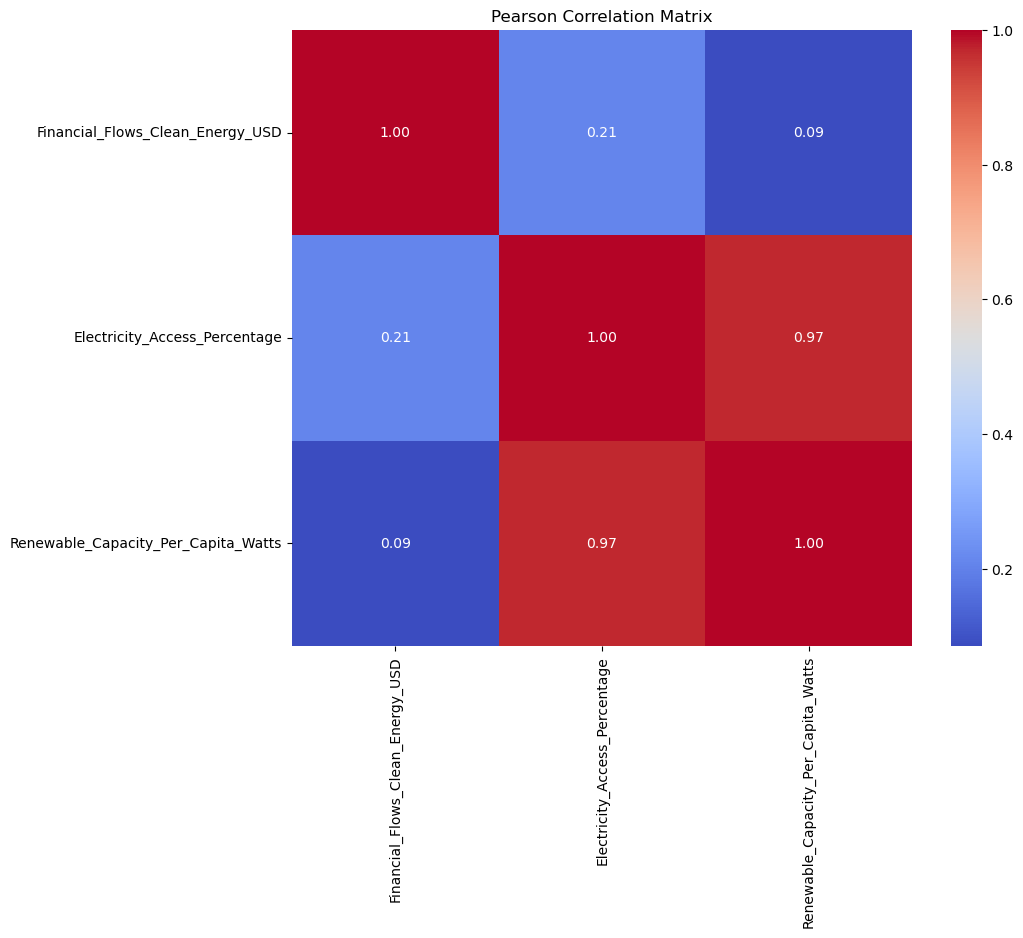

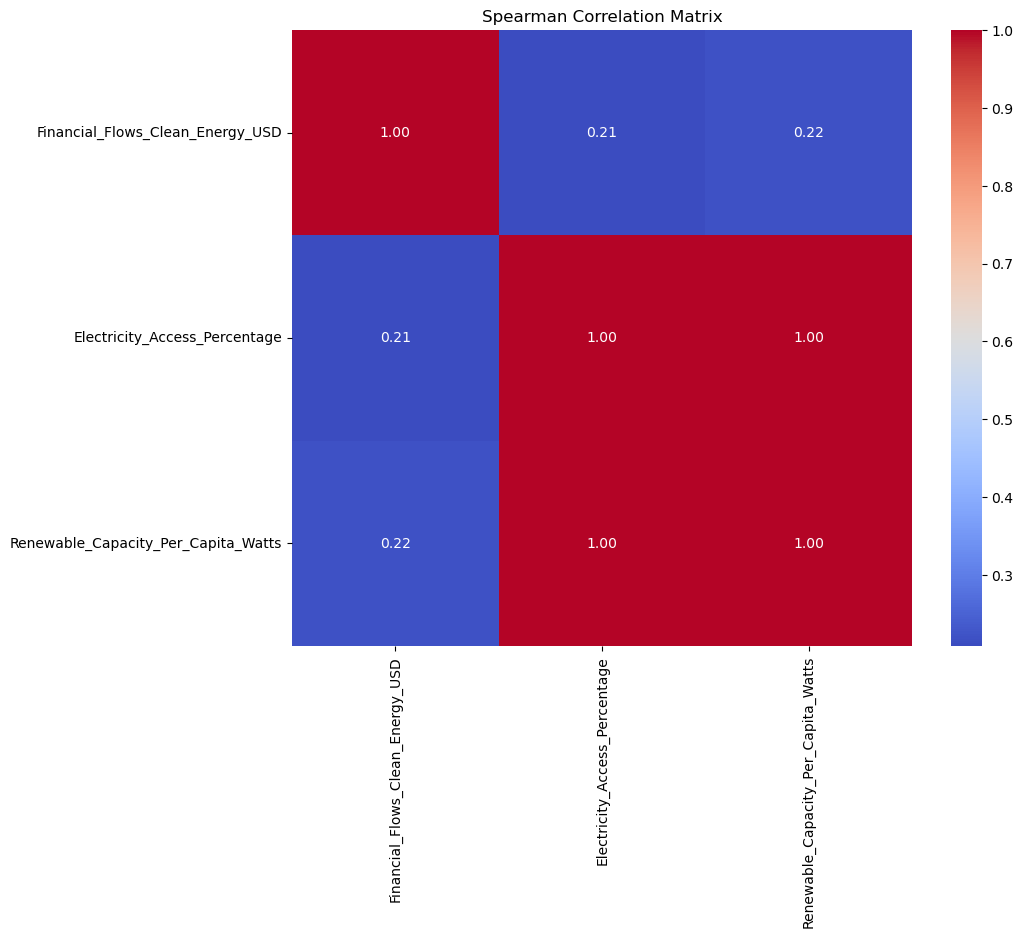

In [4]:
# Filter the data for 'ALL' renewable technology type
filtered_data = final_df[(final_df["Renewable_Technology_Type"] == "ALL") & (final_df['Region'] == 'World') & (final_df['Area_Type'] == 'Allarea')]

# Select relevant columns and drop NaN values
correlation_data = filtered_data[[
    "Financial_Flows_Clean_Energy_USD",
    "Electricity_Access_Percentage",
    "Renewable_Capacity_Per_Capita_Watts"
]]

# Calculate Pearson and Spearman correlations
pearson_corr = correlation_data.corr(method="pearson")
spearman_corr = correlation_data.corr(method="spearman")

# Display correlations
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Heatmap for Pearson correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Heatmap for Spearman correlation
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

Next Step: Urban-Rural Divide Analysis
Urban aur Rural divide ka analysis directly humare energy inequality wale objective ko address karega. Isme hum yeh dekhenge:

Electricity Access: Urban aur Rural areas ke beech disparity kaisi evolve hui hai?
Renewable Capacity: Kya renewable investments se rural areas ki access improve hui hai?
Financial Flows: Kya financial flows ne urban-rural divide ko kam karne mein role play kiya hai?
Proposal for Urban-Rural Divide Analysis
Disparity Calculation:

Ek metric define karte hain:
Disparity
=
Electricity Access (Urban)
−
Electricity Access (Rural)
Disparity=Electricity Access (Urban)−Electricity Access (Rural)
Year-wise aur region-wise disparity plot karte hain.
Trend Analysis:

Check karte hain ki disparity kam hui hai ya nahi over time.
Regression Model:

Dependent Variable: Disparity (Urban - Rural)
Independent Variables: Financial Flows, Renewable Capacity, Region/Year dummies.

Step 1: Calculate Disparity
We'll calculate the disparity in electricity access between urban and rural areas year-wise. This is:

Disparity
=
Electricity Access (Urban)
−
Electricity Access (Rural)


Disparity=Electricity Access (Urban)−Electricity Access (Rural)

Step 2: Trend Analysis

We'll plot this disparity over time:

A line chart to show how the disparity changes over the years.

Separate regional plots to highlight region-wise disparities.

Step 3: Regression Analysis

Build a regression model to assess the impact of:


Financial Flows on disparity reduction.

Renewable Capacity on disparity reduction.

Including year as a control variable to observe temporal trends.


Steps for Calculating Disparity (Urban-Rural Divide)
Filter the Data:

We will include only 'ALL' in the Renewable_Technology_Type column to maintain consistency.
Exclude rows where Region is World, India, or China, focusing solely on regional trends.
Pivot Data:

Create a pivot table where rows are Year and Region, columns are Area_Type (Urban and Rural), and values are Electricity_Access_Percentage.
Calculate Disparity:

Subtract Rural electricity access from Urban electricity access:
Disparity =
Urban Electricity Access
−
Rural Electricity Access
Disparity=Urban Electricity Access−Rural Electricity Access
Global and Regional Trends:

Global Trend: Plot the average disparity over time across all regions.
Regional Trends: Plot disparities region-wise for more localized insights.

In [6]:
final_df

,Region,Year,Electricity_Access_Percentage,Area_Type,Financial_Flows_Clean_Energy_USD,Renewable_Technology_Type,Renewable_Capacity_Per_Capita_Watts,Renewable_Share_in_TFEC_Percentage
0,China,2010,99.7,Allarea,143.76,ALL,173.01473,12.26
1,China,2010,99.4,Rural,143.76,ALL,173.01473,12.26
2,China,2010,100.0,Urban,143.76,ALL,173.01473,12.26
3,China,2010,99.7,Allarea,71.17,BIOENERGY,2.55631,12.26
4,China,2010,99.4,Rural,71.17,BIOENERGY,2.55631,12.26
...,...,...,...,...,...,...,...,...
2803,World,2022,97.7,Urban,5333.07,SOLAR,133.15360,18.71
2804,World,2022,84.0,Rural,5333.07,SOLAR,133.15360,18.71
2805,World,2022,91.4,Allarea,1691.42,WIND,112.73321,18.71
2806,World,2022,97.7,Urban,1691.42,WIND,112.73321,18.71


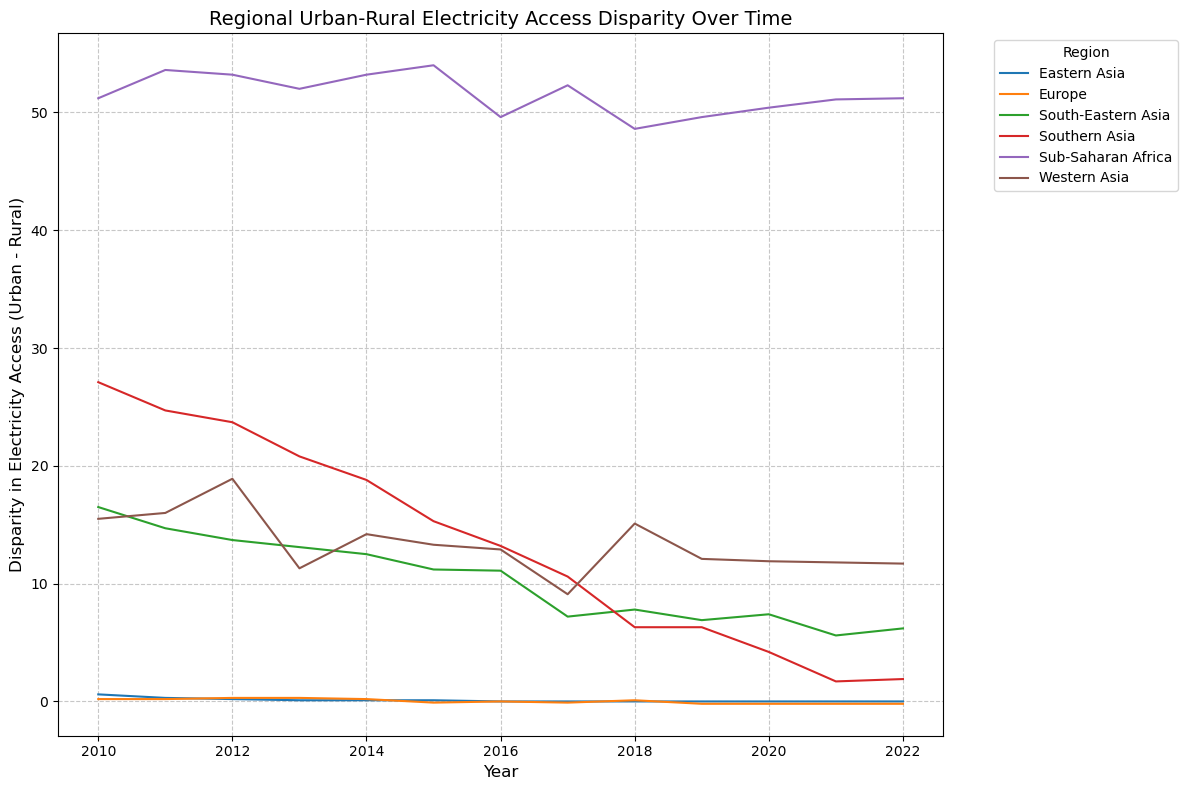

In [7]:
# Filter the data for 'ALL' Renewable Technology and exclude 'World', 'India', 'China'
filtered_data = final_df[
    (final_df["Renewable_Technology_Type"] == "ALL") &
    (~final_df["Region"].isin(["World", "India", "China"]))
]

# Pivot table for Urban and Rural electricity access
disparity_data = filtered_data.pivot_table(
    index=["Year", "Region"],
    columns="Area_Type",
    values="Electricity_Access_Percentage"
).reset_index()

# Calculate Disparity
disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

# Regional Trends: Urban-Rural Disparity Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=disparity_data, x="Year", y="Disparity", hue="Region", palette="tab10", ci=None
)
plt.title("Regional Urban-Rural Electricity Access Disparity Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Disparity in Electricity Access (Urban - Rural)", fontsize=12)
plt.legend(title="Region", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


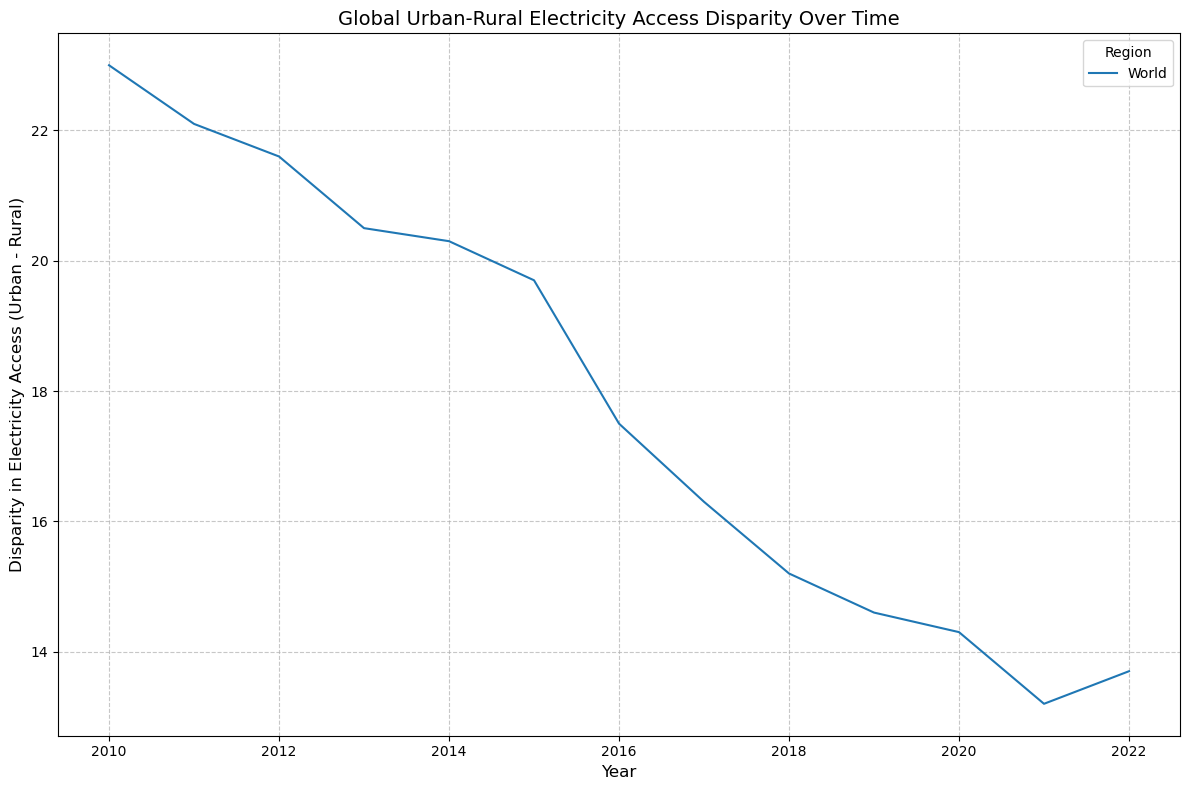

In [8]:
# Filter the data for 'ALL' Renewable Technology and exclude 'Other Regions', 'India', 'China'
filtered_data = final_df[
    (final_df["Renewable_Technology_Type"] == "ALL") &
    (final_df["Region"].isin(["World"]))
]

# Pivot table for Urban and Rural electricity access
disparity_data = filtered_data.pivot_table(
    index=["Year", "Region"],
    columns="Area_Type",
    values="Electricity_Access_Percentage"
).reset_index()

# Calculate Disparity
disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

# Regional Trends: Urban-Rural Disparity Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=disparity_data, x="Year", y="Disparity", hue="Region", palette="tab10", ci=None
)
plt.title("Global Urban-Rural Electricity Access Disparity Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Disparity in Electricity Access (Urban - Rural)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


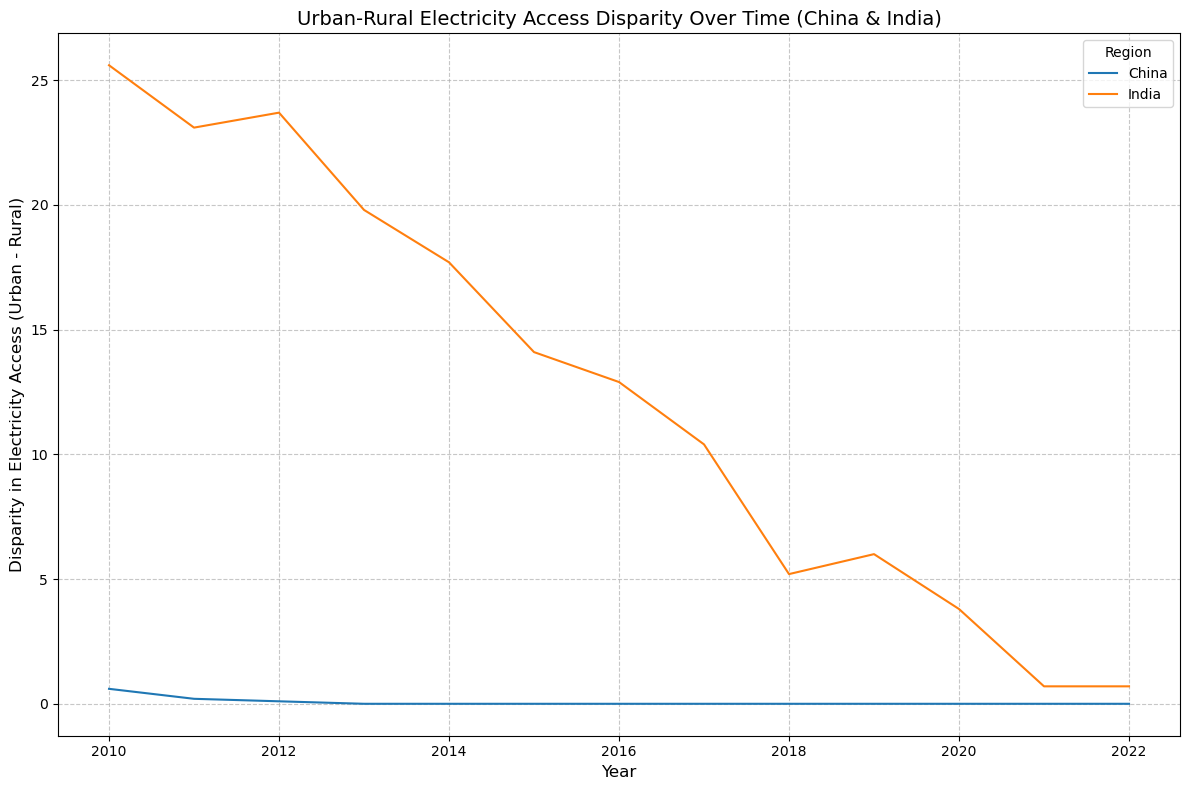

In [9]:
# Filter the data for 'ALL' Renewable Technology and exclude 'Other Regions', World.
filtered_data = final_df[
    (final_df["Renewable_Technology_Type"] == "ALL") &
    (final_df["Region"].isin(["India", "China"]))
]

# Pivot table for Urban and Rural electricity access
disparity_data = filtered_data.pivot_table(
    index=["Year", "Region"],
    columns="Area_Type",
    values="Electricity_Access_Percentage"
).reset_index()

# Calculate Disparity
disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

# Regional Trends: Urban-Rural Disparity Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=disparity_data, x="Year", y="Disparity", hue="Region", palette="tab10", ci=None
)
plt.title("Urban-Rural Electricity Access Disparity Over Time (China & India)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Disparity in Electricity Access (Urban - Rural)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
disparity_data[disparity_data['Region'] == 'Southern Asia']

Area_Type,Year,Region,Allarea,Rural,Urban,Disparity


In [21]:
filtered_data = final_df[
    (final_df["Renewable_Technology_Type"] == "ALL") 
]

# Pivot table for Urban and Rural electricity access
disparity_data = filtered_data.pivot_table(
    index=["Year", "Region"],
    columns="Area_Type",
    values="Electricity_Access_Percentage"
).reset_index()

# Calculate Disparity
disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

In [22]:
disparity_data

Area_Type,Year,Region,Allarea,Rural,Urban,Disparity
0,2010,China,99.7,99.4,100.0,0.6
1,2010,Eastern Asia,98.6,99.4,100.0,0.6
2,2010,Europe,99.6,99.5,99.7,0.2
3,2010,India,76.3,68.4,94.0,25.6
4,2010,South-Eastern Asia,88.6,81.3,97.8,16.5
...,...,...,...,...,...,...
112,2022,South-Eastern Asia,96.8,93.2,99.4,6.2
113,2022,Southern Asia,98.4,98.0,99.9,1.9
114,2022,Sub-Saharan Africa,51.0,29.8,81.0,51.2
115,2022,Western Asia,96.4,88.1,99.8,11.7


In [33]:
x = disparity_data[disparity_data['Region'] == 'World']


In [34]:
x

Area_Type,Year,Region,Allarea,Rural,Urban,Disparity
8,2010,World,83.6,72.9,95.9,23.0
17,2011,World,84.6,74.3,96.4,22.1
26,2012,World,85.1,74.9,96.5,21.6
35,2013,World,85.8,76.0,96.5,20.5
44,2014,World,86.3,76.3,96.6,20.3
53,2015,World,87.0,76.8,96.5,19.7
62,2016,World,88.2,79.4,96.9,17.5
71,2017,World,89.0,80.9,97.2,16.3
80,2018,World,89.9,81.9,97.1,15.2
89,2019,World,90.2,82.7,97.3,14.6


In [10]:
final_df

,Region,Year,Electricity_Access_Percentage,Area_Type,Financial_Flows_Clean_Energy_USD,Renewable_Technology_Type,Renewable_Capacity_Per_Capita_Watts,Renewable_Share_in_TFEC_Percentage
0,China,2010,99.7,Allarea,143.76,ALL,173.01473,12.26
1,China,2010,99.4,Rural,143.76,ALL,173.01473,12.26
2,China,2010,100.0,Urban,143.76,ALL,173.01473,12.26
3,China,2010,99.7,Allarea,71.17,BIOENERGY,2.55631,12.26
4,China,2010,99.4,Rural,71.17,BIOENERGY,2.55631,12.26
...,...,...,...,...,...,...,...,...
2803,World,2022,97.7,Urban,5333.07,SOLAR,133.15360,18.71
2804,World,2022,84.0,Rural,5333.07,SOLAR,133.15360,18.71
2805,World,2022,91.4,Allarea,1691.42,WIND,112.73321,18.71
2806,World,2022,97.7,Urban,1691.42,WIND,112.73321,18.71


# Technology-Wise Contributions

In [11]:
# Filter out global data and "ALL" technology types
filtered_data = final_df[
    (final_df["Region"] != "World") & 
    (final_df["Renewable_Technology_Type"] != "ALL" ) &
    (final_df["Renewable_Technology_Type"] != "MULTIPLE" ) &
    (final_df["Renewable_Technology_Type"] != "MARINE" )
]

# Group by Renewable Technology Type
technology_summary = filtered_data.groupby("Renewable_Technology_Type").agg({
    "Financial_Flows_Clean_Energy_USD": "mean",
    "Renewable_Capacity_Per_Capita_Watts": "mean"
}).reset_index()

# Rename columns for better understanding
technology_summary.rename(columns={
    "Financial_Flows_Clean_Energy_USD": "Avg_Financial_Flows_USD",
    "Renewable_Capacity_Per_Capita_Watts": "Avg_Capacity_Per_Capita_Watts"
}, inplace=True)

# Add an Efficiency column (Watts per USD invested)
technology_summary["Efficiency_Watts_Per_USD"] = (
    technology_summary["Avg_Capacity_Per_Capita_Watts"] / technology_summary["Avg_Financial_Flows_USD"]
)

# Display the summary
technology_summary

,Renewable_Technology_Type,Avg_Financial_Flows_USD,Avg_Capacity_Per_Capita_Watts,Efficiency_Watts_Per_USD
0,BIOENERGY,35.174712,11.769966,0.334614
1,GEOTHERMAL,59.224038,1.469090,0.024806
2,HYDROPOWER,482.363365,126.680320,0.262624
3,SOLAR,352.019423,51.987839,0.147685
4,WIND,92.634423,61.779896,0.666922


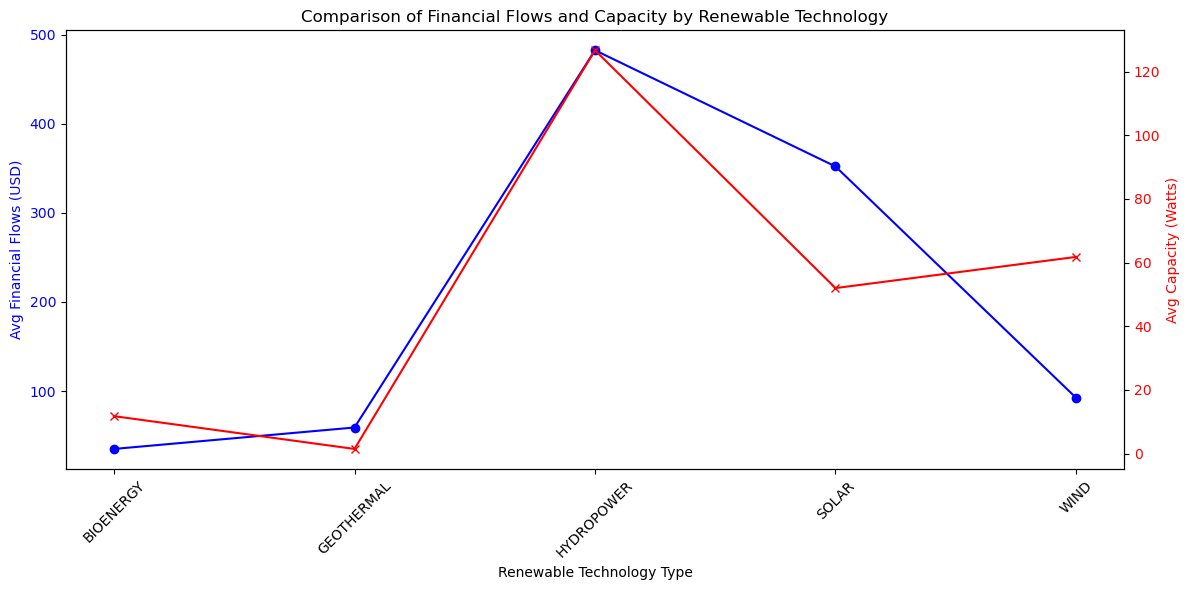

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Financial Flows on primary y-axis
ax1.set_xlabel("Renewable Technology Type")
ax1.set_ylabel("Avg Financial Flows (USD)", color="blue")
ax1.plot(technology_summary["Renewable_Technology_Type"], technology_summary["Avg_Financial_Flows_USD"], marker="o", color="blue", label="Avg Financial Flows (USD)")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(technology_summary["Renewable_Technology_Type"], rotation=45)

# Capacity on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Avg Capacity (Watts)", color="red")
ax2.plot(technology_summary["Renewable_Technology_Type"], technology_summary["Avg_Capacity_Per_Capita_Watts"], marker="x", color="red", label="Avg Capacity (Watts)")
ax2.tick_params(axis="y", labelcolor="red")

# Title and layout
plt.title("Comparison of Financial Flows and Capacity by Renewable Technology")
fig.tight_layout()
plt.show()


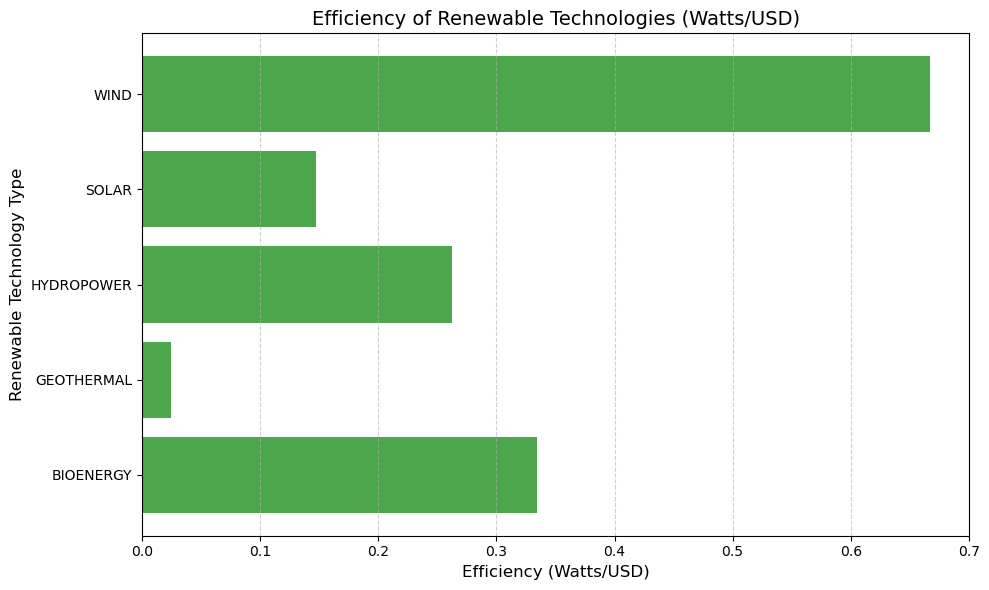

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(technology_summary["Renewable_Technology_Type"], technology_summary["Efficiency_Watts_Per_USD"], color="green", alpha=0.7)
plt.title("Efficiency of Renewable Technologies (Watts/USD)", fontsize=14)
plt.xlabel("Efficiency (Watts/USD)", fontsize=12)
plt.ylabel("Renewable Technology Type", fontsize=12)
plt.grid(axis='x', alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()
